<a href="https://colab.research.google.com/github/Marcll0/R/blob/main/An%C3%A1lise_de_regress%C3%A3o_linear_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
install.packages("corrplot")
install.packages("openxlsx")
install.packages("car")
install.packages("lmtest")
library(openxlsx)
library(car)
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
#GERANDO DADOS ALEATORIOS

#### Criação do banco de dados:
set.seed(123456789)
y <- rnorm(15000,3500,500)
x1 <- rnorm(15000,1580,456)
x2 <- as.numeric(as.integer(runif(15000,15,65)))
x3 <- rpois(15000,5)
x4 <- rbinom(15000,5,0.5)
x5 <- rnorm(1500,55,5)

dados <- data.frame(y,x1,x2,x3,x4,x5)
write.xlsx(dados,"base.xlsx")

banco <- read.xlsx("base.xlsx")
head(banco)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,y,x1,x2,x3,x4,x5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3752.436,1776.5909,36,3,4,54.84164
2,3697.938,1137.2822,51,4,1,52.41118
3,4207.769,970.4218,40,5,3,59.94532
4,3138.838,2134.7078,27,3,3,54.06101
5,3190.822,1684.2997,43,4,3,54.30000
6,2718.690,2260.6344,63,5,3,52.35590


In [27]:
# Estatísticas básicas
summary(banco)

       y              x1               x2              x3        
 Min.   :1701   Min.   :-226.2   Min.   :15.00   Min.   : 0.000  
 1st Qu.:3161   1st Qu.:1283.1   1st Qu.:27.00   1st Qu.: 3.000  
 Median :3502   Median :1591.0   Median :39.00   Median : 5.000  
 Mean   :3501   Mean   :1587.2   Mean   :39.53   Mean   : 4.988  
 3rd Qu.:3842   3rd Qu.:1893.6   3rd Qu.:52.00   3rd Qu.: 6.000  
 Max.   :5516   Max.   :3680.4   Max.   :64.00   Max.   :18.000  
       x4              x5       
 Min.   :0.000   Min.   :37.75  
 1st Qu.:2.000   1st Qu.:51.45  
 Median :3.000   Median :55.13  
 Mean   :2.513   Mean   :54.95  
 3rd Qu.:3.000   3rd Qu.:58.40  
 Max.   :5.000   Max.   :69.03  

In [23]:
## Correlação:
cor(banco,method = "pearson")

,y,x1,x2,x3,x4,x5
y,1.000000000,0.003098170,0.0106442853,-0.0100363127,0.001816619,-0.008189313
x1,0.003098170,1.000000000,0.0057277429,-0.0033492055,-0.002104780,0.012205154
x2,0.010644285,0.005727743,1.0000000000,-0.0008241369,-0.004695471,-0.008783974
x3,-0.010036313,-0.003349206,-0.0008241369,1.0000000000,-0.011515299,0.004923108
x4,0.001816619,-0.002104780,-0.0046954711,-0.0115152992,1.000000000,-0.011575911
x5,-0.008189313,0.012205154,-0.0087839744,0.0049231078,-0.011575911,1.000000000


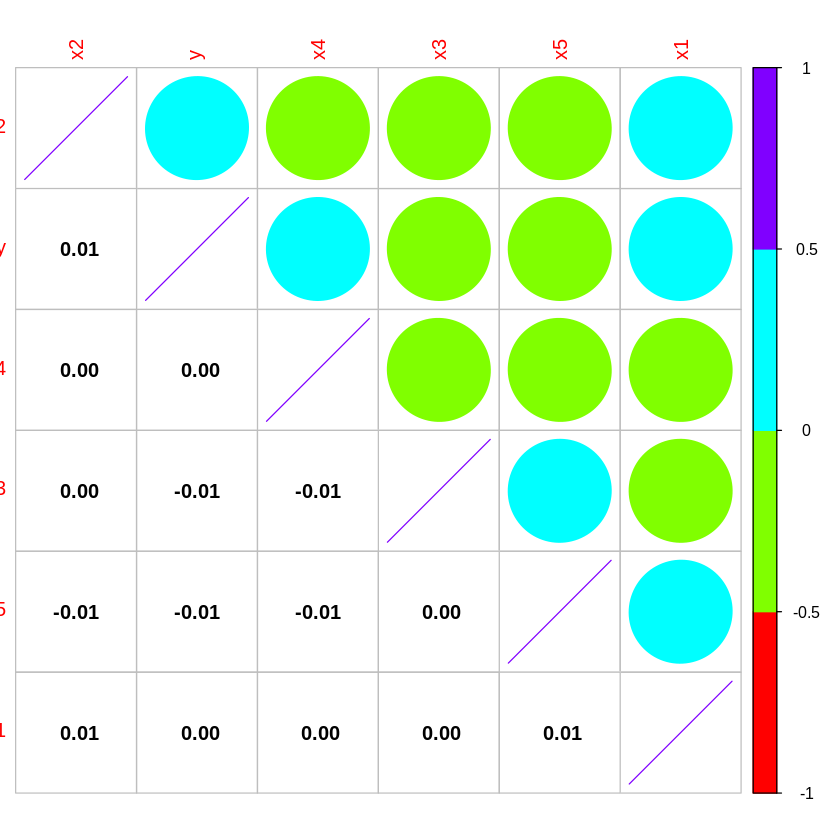

In [25]:
correlation <- cor(banco,method = "pearson")
corrplot::corrplot(correlation,type = "upper",col = rainbow(4),
                   order = 'AOE', method = "ellipse", tl.pos = 'tp')
corrplot::corrplot(correlation,add = TRUE,type = "lower",method = "number", order = 'AOE',
          col = 'black', diag = FALSE, tl.pos = 'n', cl.pos = 'n')

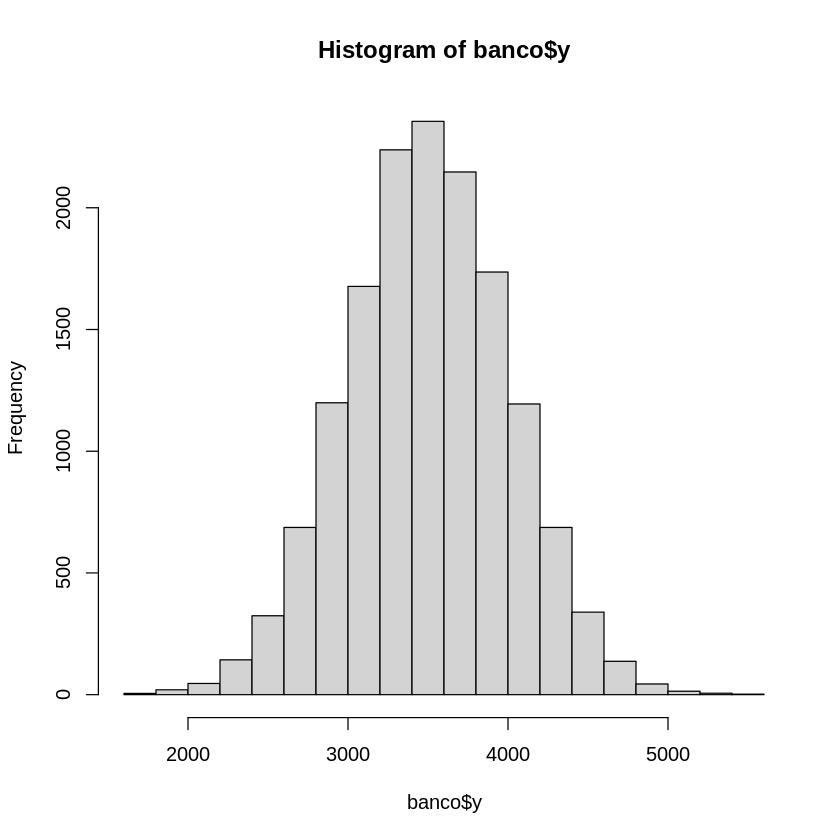

In [26]:
# Histograma
hist(banco$y)

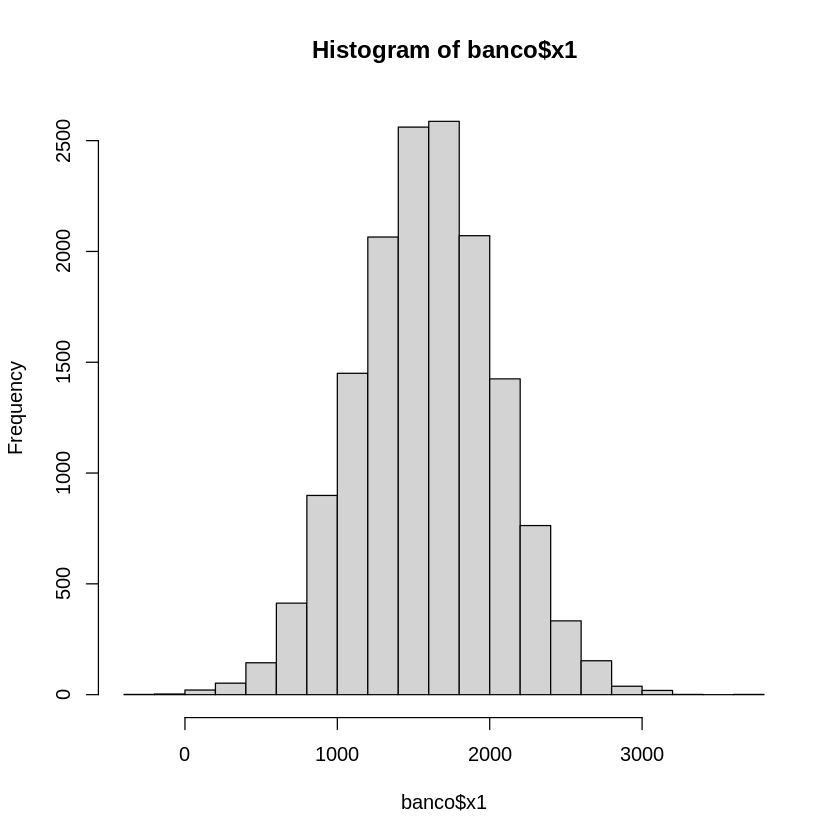

In [28]:
hist(banco$x1)

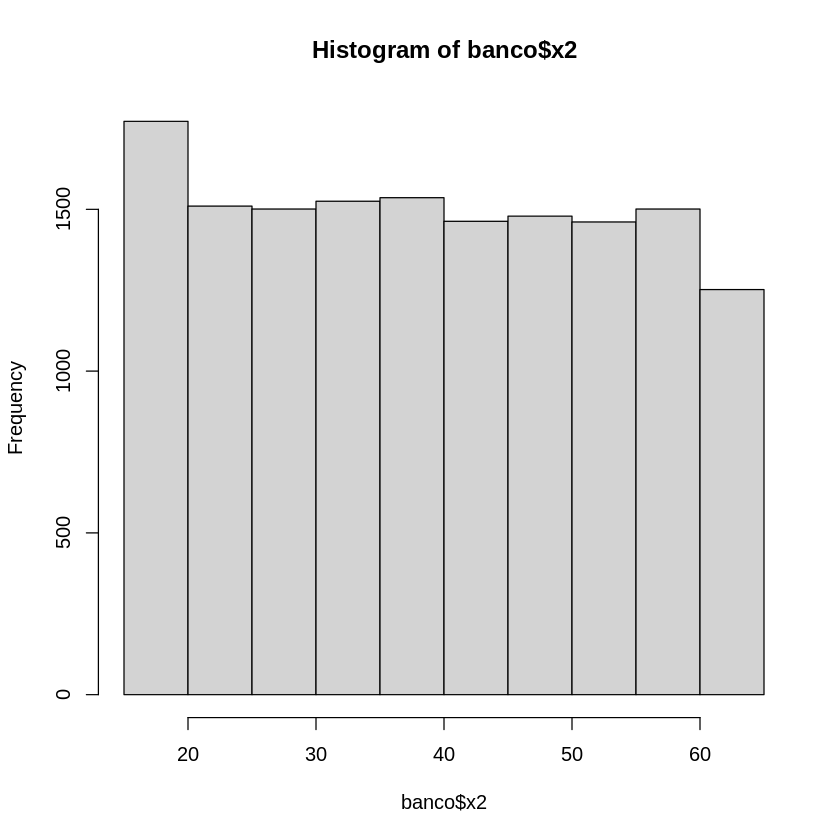

In [29]:
hist(banco$x2)

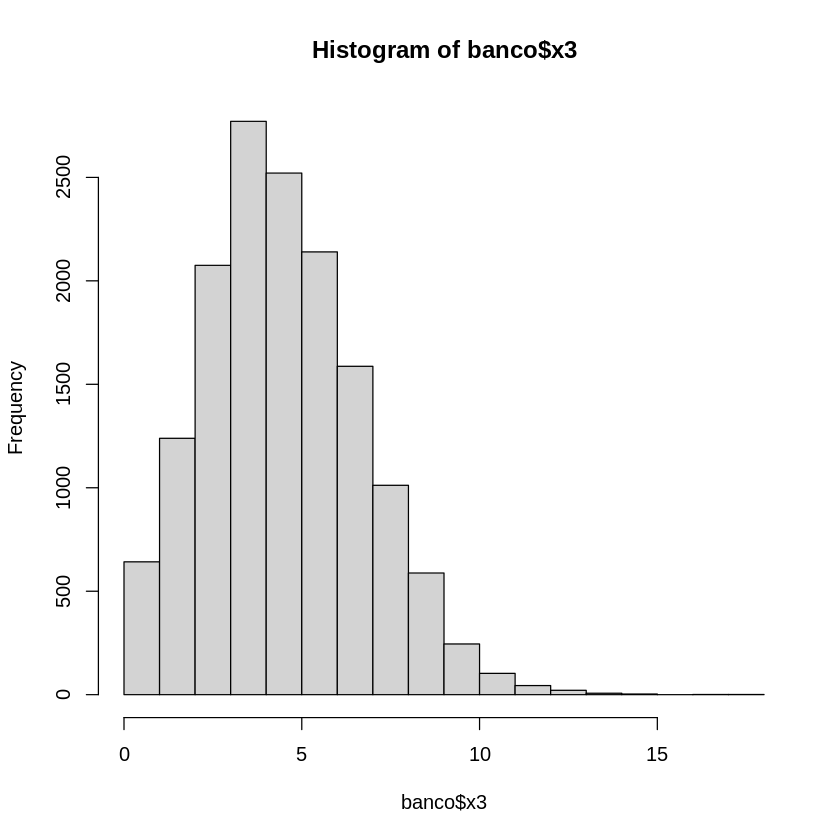

In [30]:
hist(banco$x3)

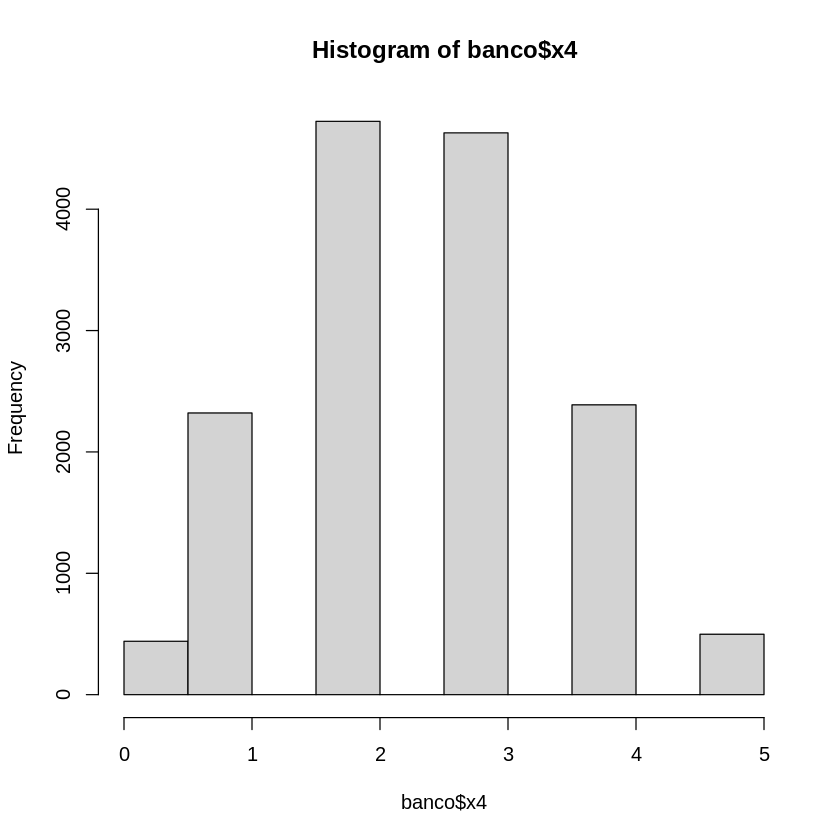

In [31]:
hist(banco$x4)

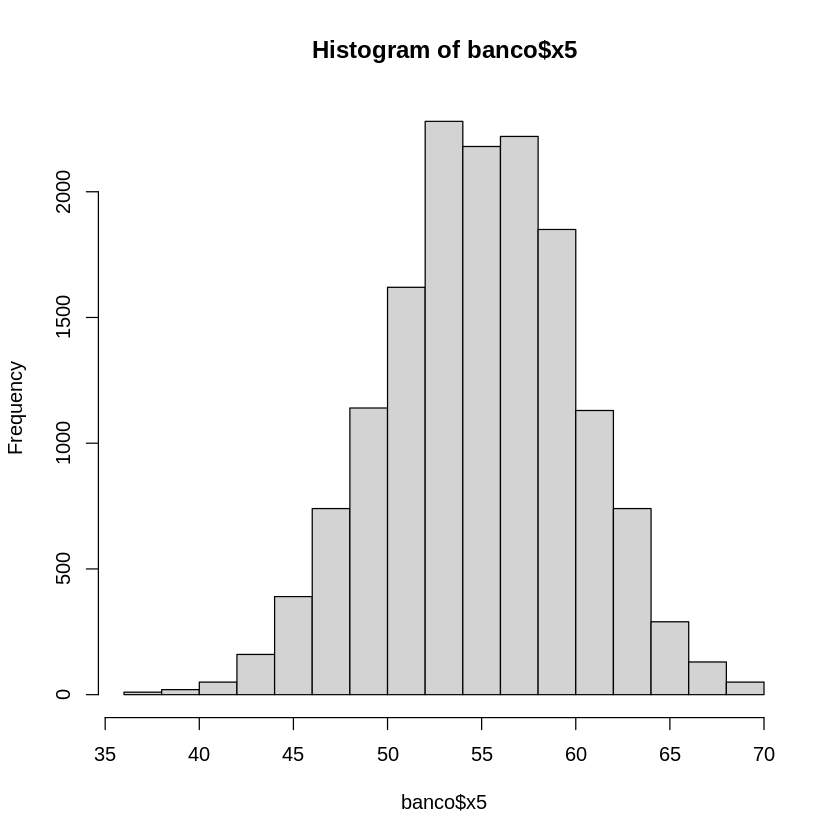

In [32]:
hist(banco$x5)

In [33]:
# Construção do modelo de regressão linear múltipla
modelo <- lm(data=banco,y~.)
summary(modelo)


Call:
lm(formula = y ~ ., data = banco)

Residuals:
     Min       1Q   Median       3Q      Max 
-1784.99  -337.43     0.55   339.95  2019.17 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.534e+03  5.005e+01  70.614   <2e-16 ***
x1           3.418e-03  8.987e-03   0.380    0.704    
x2           3.673e-01  2.841e-01   1.293    0.196    
x3          -2.238e+00  1.835e+00  -1.219    0.223    
x4           7.471e-01  3.665e+00   0.204    0.838    
x5          -8.014e-01  8.115e-01  -0.988    0.323    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 502.4 on 14994 degrees of freedom
Multiple R-squared:  0.000291,	Adjusted R-squared:  -4.237e-05 
F-statistic: 0.8729 on 5 and 14994 DF,  p-value: 0.4982


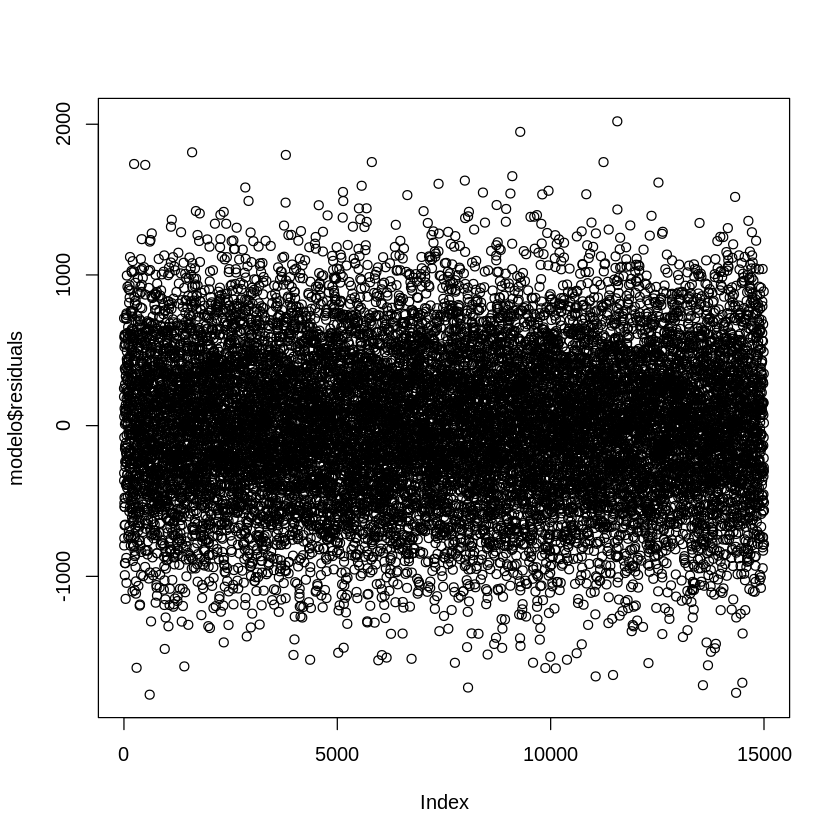

In [34]:
#Verificação dos resíduos do modelo
plot(modelo$residuals)

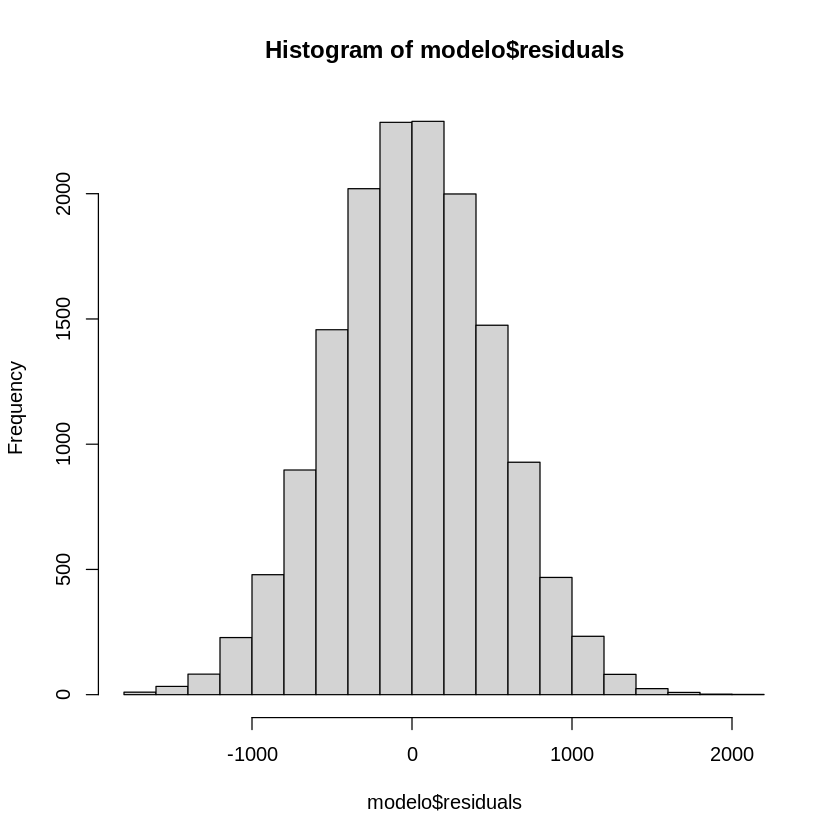

In [35]:
hist(modelo$residuals)

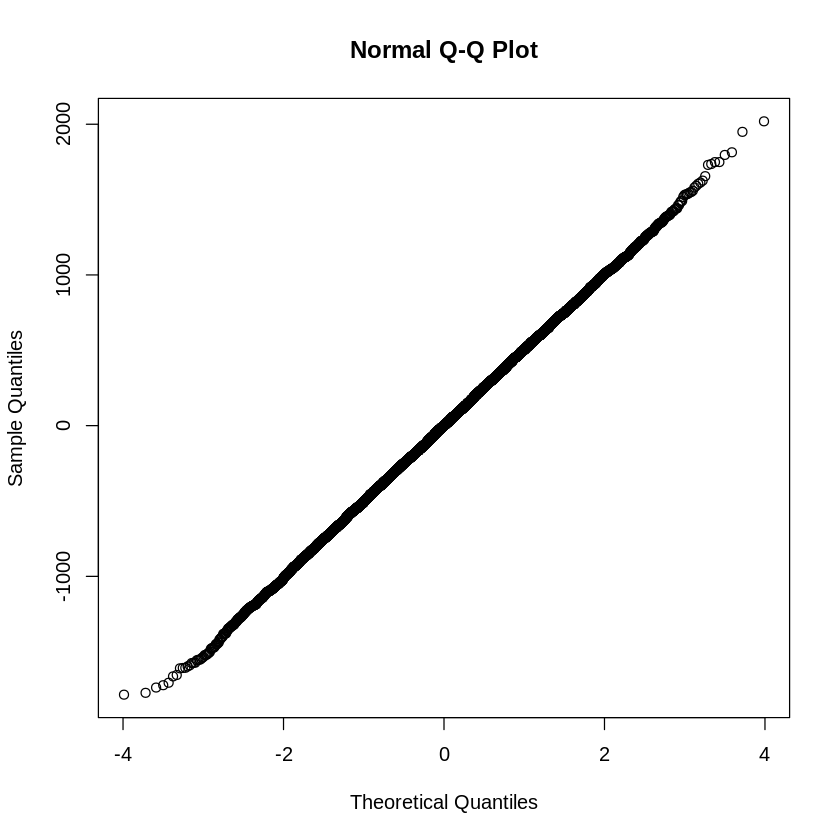

In [36]:
# shapiro.test(modelo$residuals)
qqnorm(modelo$residuals)

In [38]:
# Verificação do VIF (Variance inflation factor)
# VIF é uma medida da proporção em que a variância de um coeficiente de regressão é inflacionado pela presença de outra variável explicativa.

# Recomendável: VIF < 10;

vif(modelo)

x1       x2       x3       x4       x5 
1.000199 1.000135 1.000168 1.000292 1.000385

In [40]:
# Homocedasticidade e heterocedasticidade

bptest(modelo)


	studentized Breusch-Pagan test

data:  modelo
BP = 5.1936, df = 5, p-value = 0.3927


In [41]:
coeftest(modelo)


t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)    
(Intercept)  3.5339e+03  5.0045e+01 70.6138   <2e-16 ***
x1           3.4184e-03  8.9868e-03  0.3804   0.7037    
x2           3.6727e-01  2.8413e-01  1.2926   0.1962    
x3          -2.2377e+00  1.8350e+00 -1.2195   0.2227    
x4           7.4708e-01  3.6651e+00  0.2038   0.8385    
x5          -8.0144e-01  8.1146e-01 -0.9877   0.3233    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


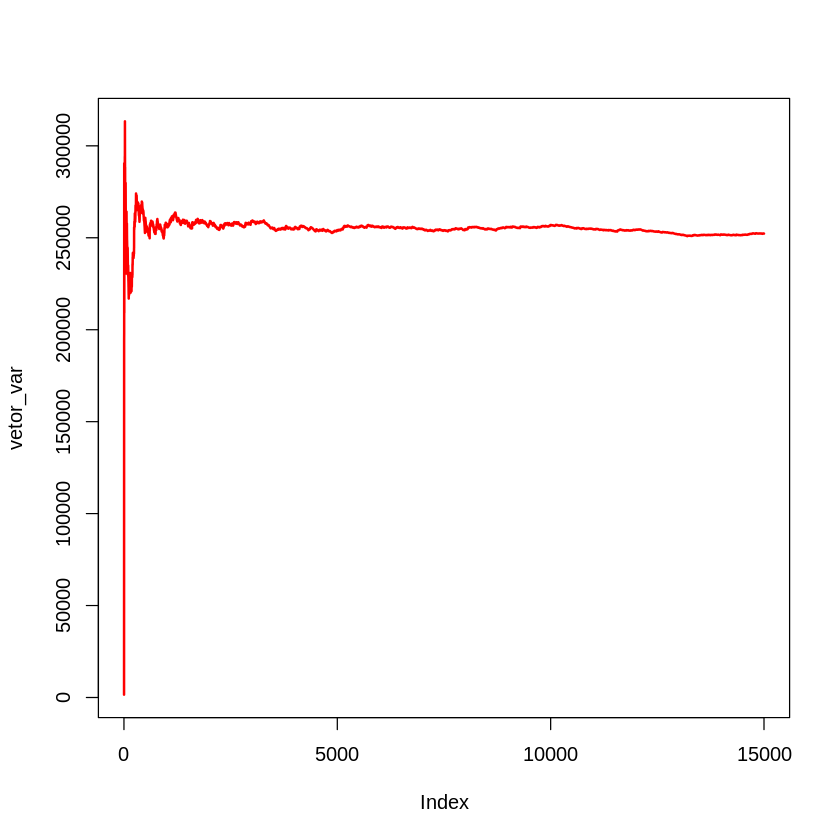

In [42]:
# Verificar a variância ao longo da amostra - visualmente:
vetor_var <- c()
for (i in 1:15000) {
  vetor_var <- c(vetor_var,var(modelo$residuals[1:i]))
}
plot(vetor_var,type = "l",lwd=2, col="red")

In [43]:
# modelo novo pelo método stepwise

modelo_novo <- step(modelo)

Start:  AIC=186585.9
y ~ x1 + x2 + x3 + x4 + x5

       Df Sum of Sq        RSS    AIC
- x4    1     10486 3784088753 186584
- x1    1     36517 3784114783 186584
- x5    1    246183 3784324450 186585
- x3    1    375307 3784453573 186585
- x2    1    421662 3784499929 186586
<none>              3784078266 186586

Step:  AIC=186584
y ~ x1 + x2 + x3 + x5

       Df Sum of Sq        RSS    AIC
- x1    1     36440 3784125192 186582
- x5    1    247390 3784336143 186583
- x3    1    376797 3784465550 186583
- x2    1    421035 3784509787 186584
<none>              3784088753 186584

Step:  AIC=186582.1
y ~ x2 + x3 + x5

       Df Sum of Sq        RSS    AIC
- x5    1    245102 3784370294 186581
- x3    1    377600 3784502792 186582
- x2    1    422495 3784547687 186582
<none>              3784125192 186582

Step:  AIC=186581.1
y ~ x2 + x3

       Df Sum of Sq        RSS    AIC
- x3    1    380606 3784750900 186581
- x2    1    428198 3784798492 186581
<none>              3784370294 186581


In [44]:
summary(modelo_novo)


Call:
lm(formula = y ~ 1, data = banco)

Residuals:
     Min       1Q   Median       3Q      Max 
-1799.06  -339.23     1.09   341.21  2015.74 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3500.513      4.102   853.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 502.4 on 14999 degrees of freedom


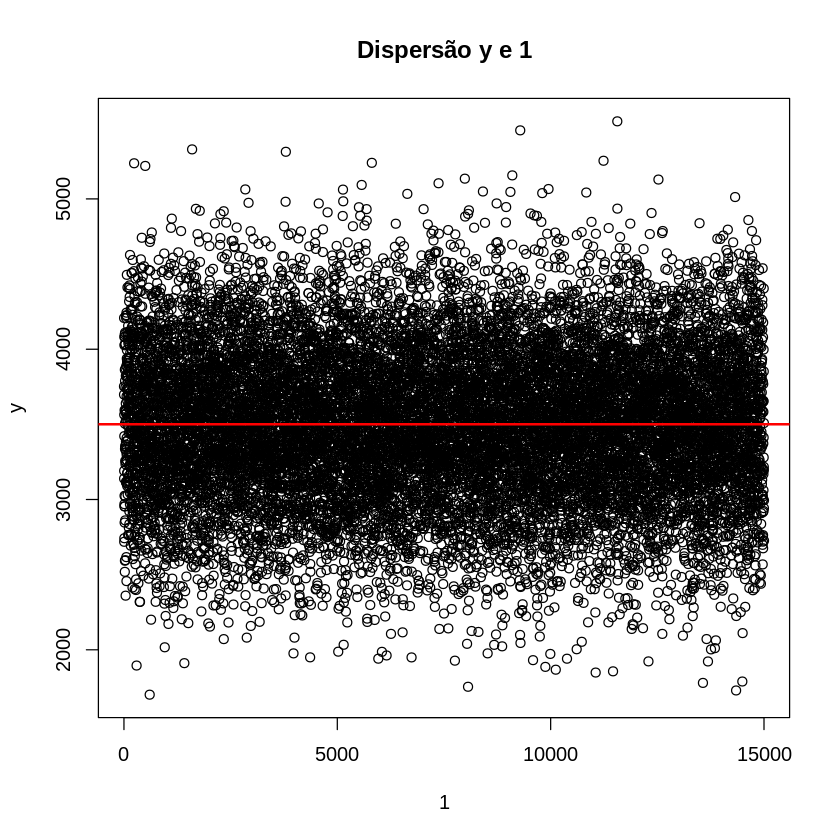

In [45]:
plot(banco$y~1, main = "Dispersão y e 1",
     xlab="1",ylab = "y")
abline(modelo_novo,lwd=2,col="red")